In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# merging two csv files 
df = pd.concat( 
    map(pd.read_csv, ["C:\\Users\\DELL\\Desktop\\India_Estate_Price-Map\\data\\Bangalore.csv",
    "C:\\Users\\DELL\\Desktop\\India_Estate_Price-Map\\data\\Chennai.csv",
    "C:\\Users\\DELL\\Desktop\\India_Estate_Price-Map\\data\\Delhi.csv",
    "C:\\Users\\DELL\\Desktop\\India_Estate_Price-Map\\data\\Hyderabad.csv",
    "C:\\Users\\DELL\\Desktop\\India_Estate_Price-Map\\data\\Kolkata.csv",
    "C:\\Users\\DELL\\Desktop\\India_Estate_Price-Map\\data\\Mumbai.csv"]),ignore_index=True) 

In [3]:
# Save the merged DataFrame to a new CSV file
output_path = "C:\\Users\\DELL\\Desktop\\India_Estate_Price-Map\\data\\Indain_House_Price.csv"
df.to_csv(output_path, index=False)

print(f"Data saved successfully to {output_path}")

Data saved successfully to C:\Users\DELL\Desktop\India_Estate_Price-Map\data\Indain_House_Price.csv


In [4]:
df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32958,14500000,1180,Mira Road East,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32959,14500000,530,Naigaon East,1,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32960,4100000,700,Shirgaon,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32961,2750000,995,Mira Road East,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [5]:
df.shape

(32963, 40)

In [6]:
df.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,3.296300e+04,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,...,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000
mean,1.168672e+07,1293.362194,2.411765,0.381397,6.296454,6.403725,6.371325,6.351151,6.346328,6.356855,...,6.463671,6.272154,6.335497,6.259169,6.250887,6.261293,6.260413,6.259867,6.250675,6.260019
std,2.307368e+07,763.703754,0.812800,0.485737,4.075024,3.917995,3.966385,3.996086,4.003140,3.987722,...,3.826128,4.109373,4.018912,4.127551,4.139083,4.124586,4.125815,4.126577,4.139378,4.126365
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.071500e+06,853.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.711000e+06,1125.000000,2.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.200000e+07,1500.000000,3.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,8.546000e+08,16000.000000,9.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [7]:
df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32963 entries, 0 to 32962
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                32963 non-null  int64 
 1   Area                 32963 non-null  int64 
 2   Location             32963 non-null  object
 3   No. of Bedrooms      32963 non-null  int64 
 4   Resale               32963 non-null  int64 
 5   MaintenanceStaff     32963 non-null  int64 
 6   Gymnasium            32963 non-null  int64 
 7   SwimmingPool         32963 non-null  int64 
 8   LandscapedGardens    32963 non-null  int64 
 9   JoggingTrack         32963 non-null  int64 
 10  RainWaterHarvesting  32963 non-null  int64 
 11  IndoorGames          32963 non-null  int64 
 12  ShoppingMall         32963 non-null  int64 
 13  Intercom             32963 non-null  int64 
 14  SportsFacility       32963 non-null  int64 
 15  ATM                  32963 non-null  int64 
 16  Club

In [9]:
df.isnull()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df['Location'].unique()

array(['JP Nagar Phase 1', 'Dasarahalli on Tumkur Road',
       'Kannur on Thanisandra Main Road', ..., 'Gandhar Nagar', 'Byculla',
       'Padle Gaon'], dtype=object)

In [11]:
df['Location'].nunique()


1776

In [12]:
hydr_df = df[['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale']]

In [13]:
hydr_df


,Price,Area,Location,No. of Bedrooms,Resale
0,30000000,3340,JP Nagar Phase 1,4,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0
3,8358000,1675,Doddanekundi,3,0
4,6845000,1670,Kengeri,3,0
...,...,...,...,...,...
32958,14500000,1180,Mira Road East,2,0
32959,14500000,530,Naigaon East,1,1
32960,4100000,700,Shirgaon,1,0
32961,2750000,995,Mira Road East,2,0


In [14]:
number_columns = df.select_dtypes(exclude='object')
number_columns.corr()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.000000,0.295062,0.163689,0.057410,0.039533,0.041247,0.041525,0.040677,0.040188,0.040948,...,0.039589,0.039500,0.039279,0.039016,0.038514,0.039125,0.038966,0.039052,0.038882,0.039134
Area,0.295062,1.000000,0.706007,-0.057304,-0.048674,-0.038306,-0.037183,-0.040399,-0.039786,-0.041423,...,-0.044236,-0.047606,-0.043396,-0.046494,-0.047808,-0.046955,-0.046786,-0.046696,-0.047988,-0.046777
No. of Bedrooms,0.163689,0.706007,1.000000,-0.081430,-0.041628,-0.034151,-0.032588,-0.034879,-0.034571,-0.036622,...,-0.035475,-0.039420,-0.036385,-0.037706,-0.038932,-0.037976,-0.037857,-0.037964,-0.038994,-0.037885
Resale,0.057410,-0.057304,-0.081430,1.000000,0.060388,0.047160,0.044637,0.048145,0.046946,0.052463,...,0.053522,0.057033,0.053369,0.052851,0.052646,0.053394,0.052925,0.053503,0.054885,0.052993
MaintenanceStaff,0.039533,-0.048674,-0.041628,0.060388,1.000000,0.996703,0.996574,0.997164,0.997125,0.997564,...,0.996997,0.998400,0.997422,0.998261,0.998651,0.998261,0.998213,0.998244,0.998626,0.998233
Gymnasium,0.041247,-0.038306,-0.034151,0.047160,0.996703,1.000000,0.998830,0.998032,0.998295,0.997547,...,0.997088,0.997103,0.997156,0.997313,0.997511,0.997188,0.997315,0.997362,0.997290,0.997291
SwimmingPool,0.041525,-0.037183,-0.032588,0.044637,0.996574,0.998830,1.000000,0.998323,0.998604,0.997828,...,0.996931,0.996909,0.997494,0.997504,0.997671,0.997355,0.997502,0.997523,0.997442,0.997480
LandscapedGardens,0.040677,-0.040399,-0.034879,0.048145,0.997164,0.998032,0.998323,1.000000,0.998626,0.998166,...,0.996891,0.997102,0.997687,0.997552,0.997864,0.997429,0.997545,0.997591,0.997672,0.997545
JoggingTrack,0.040188,-0.039786,-0.034571,0.046946,0.997125,0.998295,0.998604,0.998626,1.000000,0.998315,...,0.996812,0.997035,0.998100,0.997593,0.997932,0.997475,0.997556,0.997576,0.997661,0.997573
RainWaterHarvesting,0.040948,-0.041423,-0.036622,0.052463,0.997564,0.997547,0.997828,0.998166,0.998315,1.000000,...,0.996884,0.996962,0.998125,0.997408,0.997765,0.997392,0.997384,0.997416,0.997656,0.997405


<Axes: >

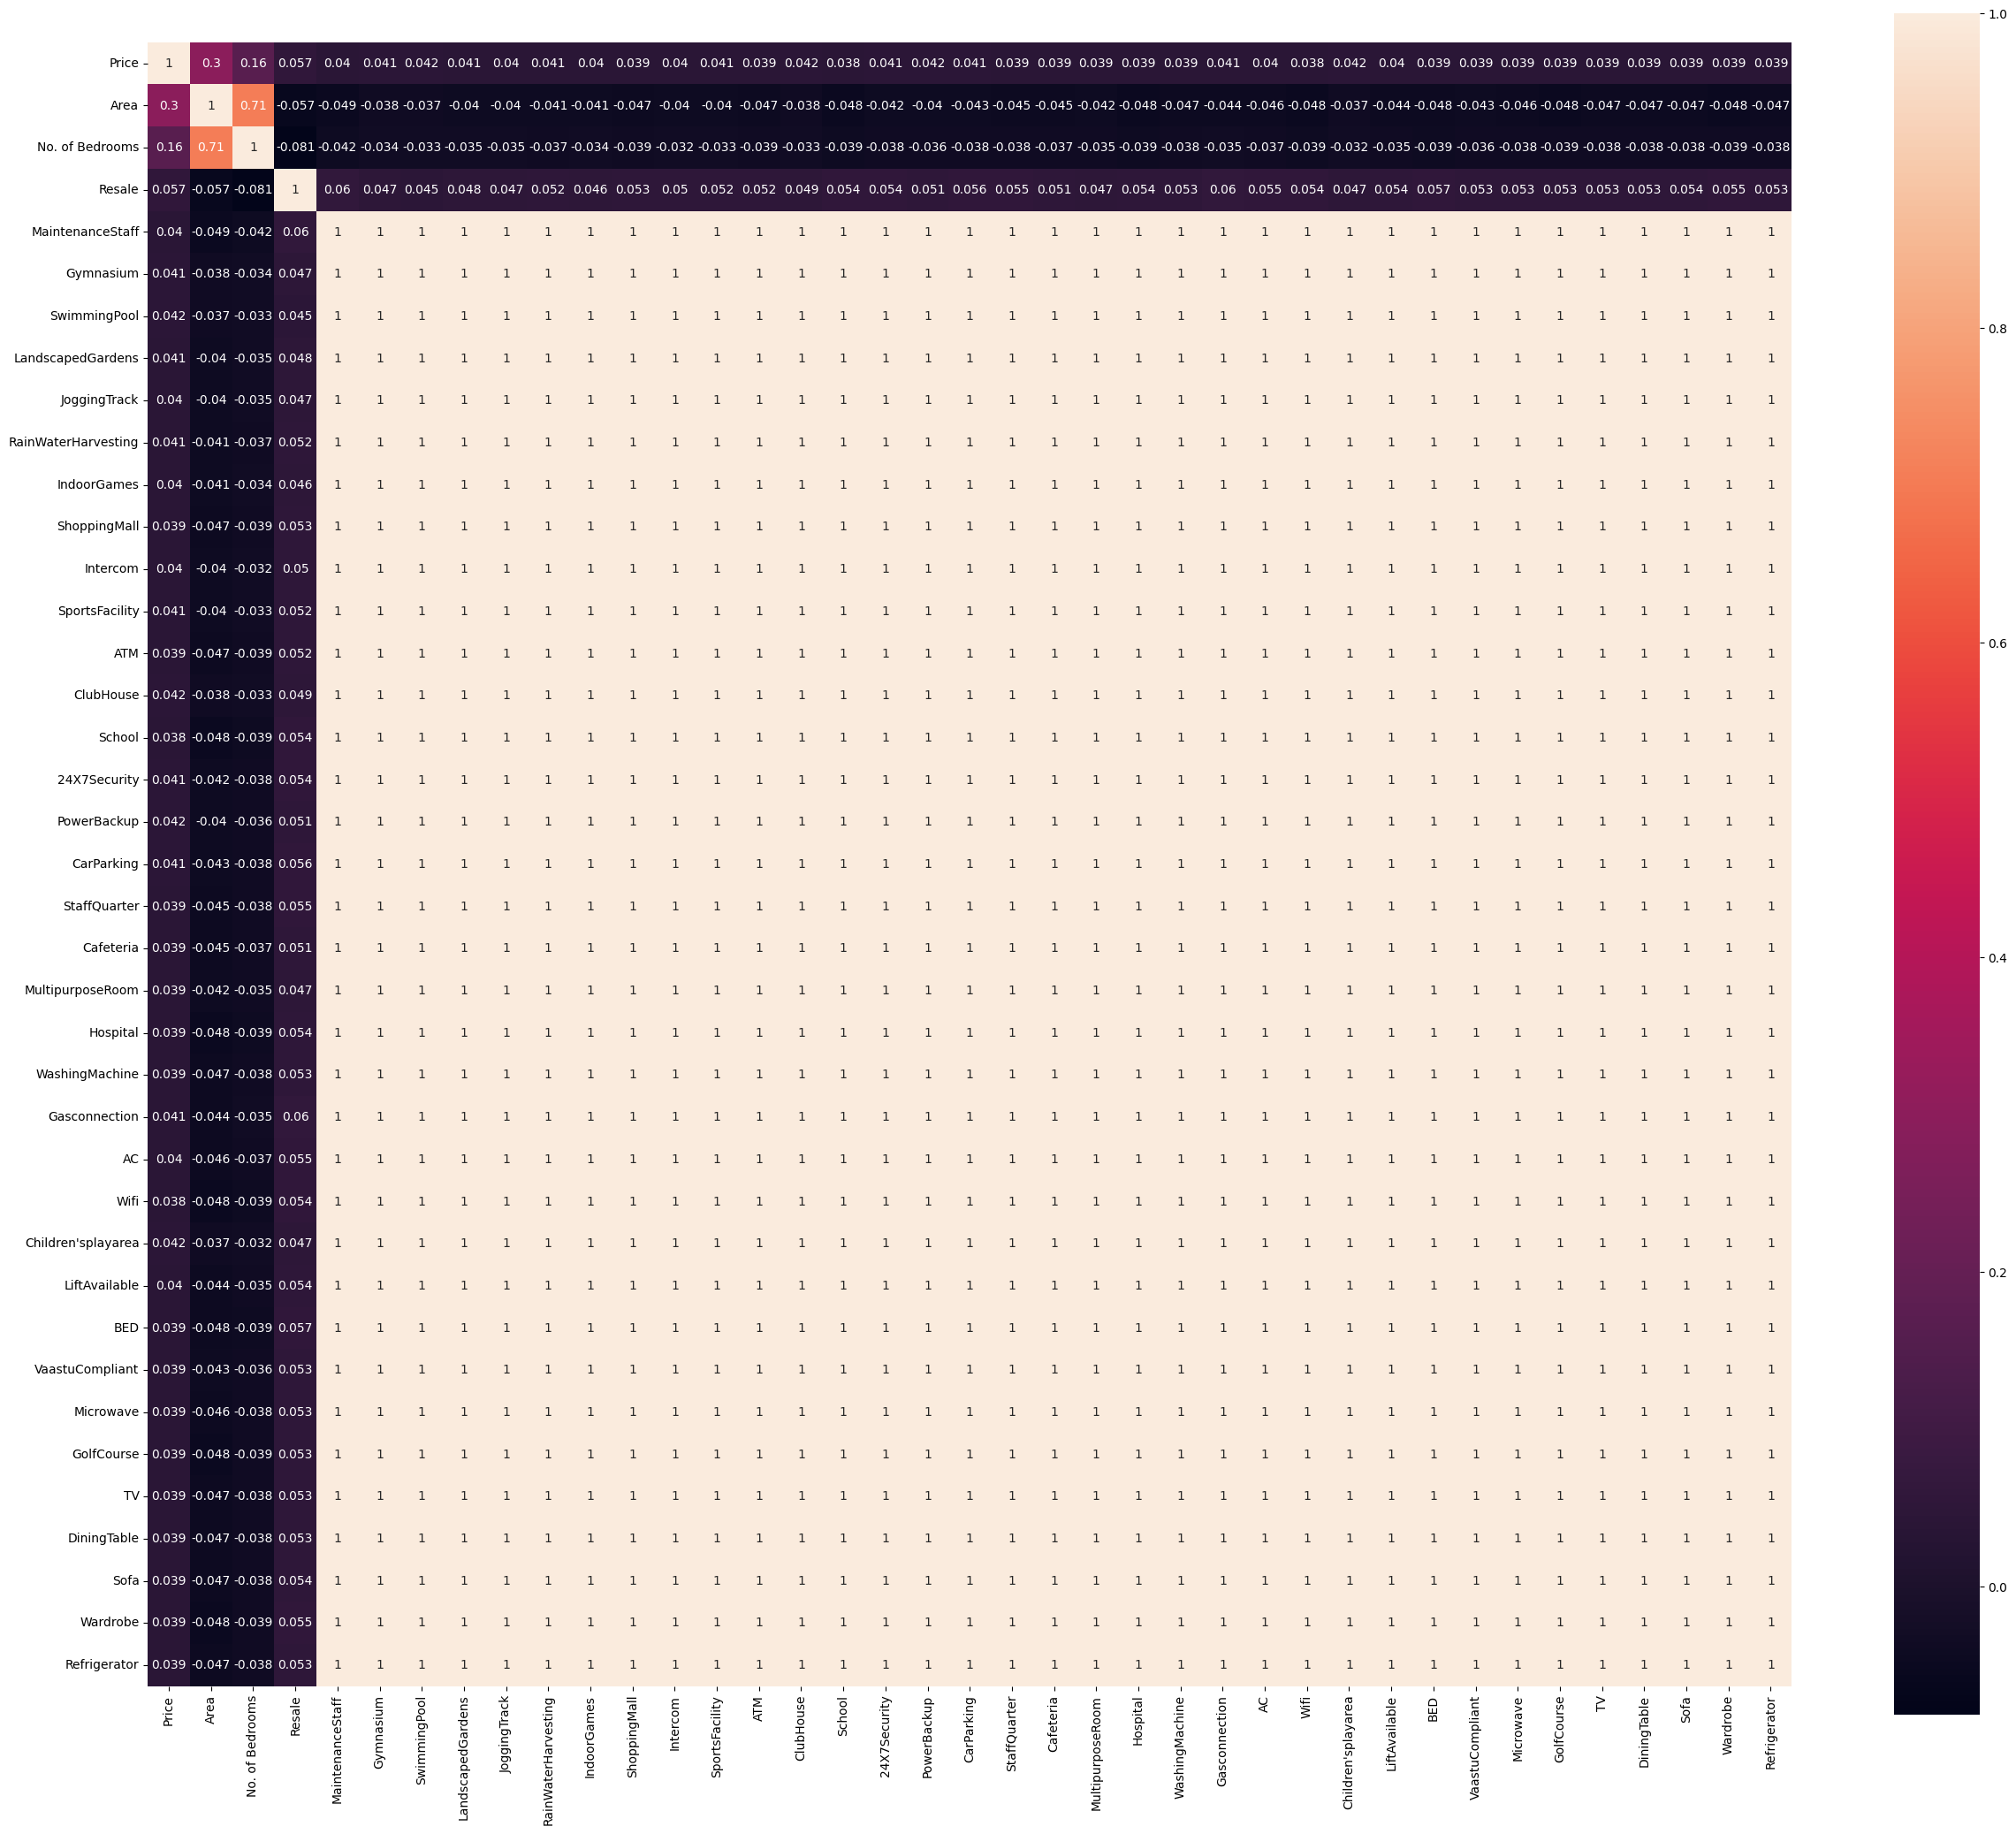

In [15]:
numbers_correlation=number_columns.corr()
plt.figure(figsize=(30,25))
sns.heatmap(numbers_correlation, annot=True, square=True)

In [16]:
selected_features = ['Area', 'No. of Bedrooms', 'Gymnasium', 'MaintenanceStaff']
X = df[selected_features]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

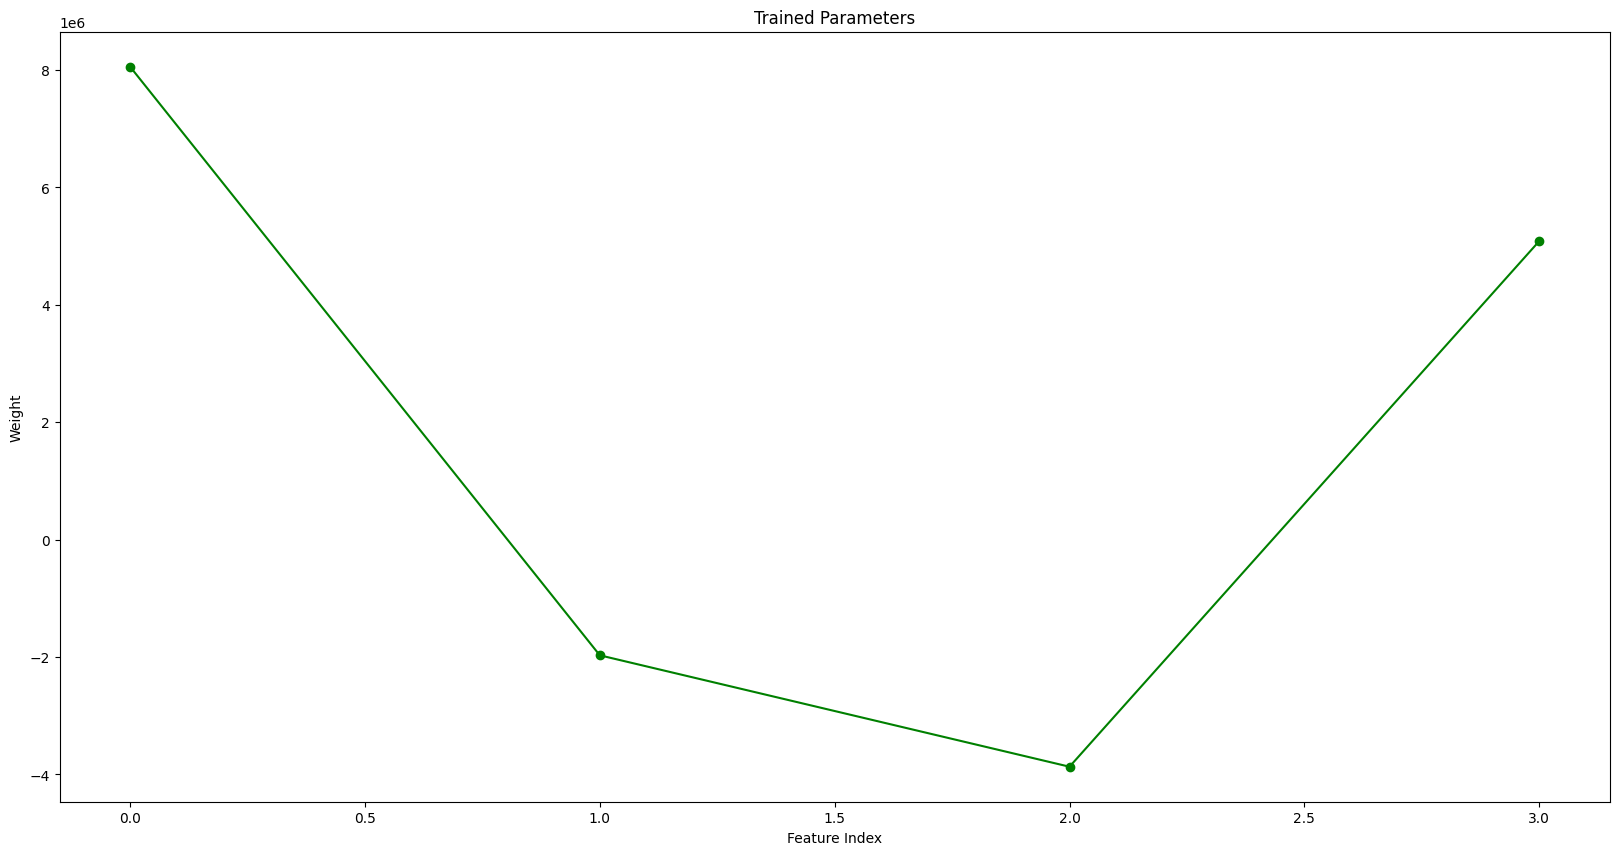

Mean Squared Error on Test Set: 482981243420247.06
R Squared Error on Test Set: 0.1163896038209925


In [18]:
plt.figure()
plt.plot(range(len(model.coef_)), model.coef_, marker='o', color='green')
plt.title('Trained Parameters')
plt.xlabel('Feature Index')
plt.ylabel('Weight')
plt.show()

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error on Test Set:", mse)
print("R Squared Error on Test Set:", r2)

In [19]:
model.coef_

array([ 8056646.35534093, -1969789.94248517, -3867691.95321767,
        5085383.29989093])

In [20]:
model.intercept_

11648398.943382632

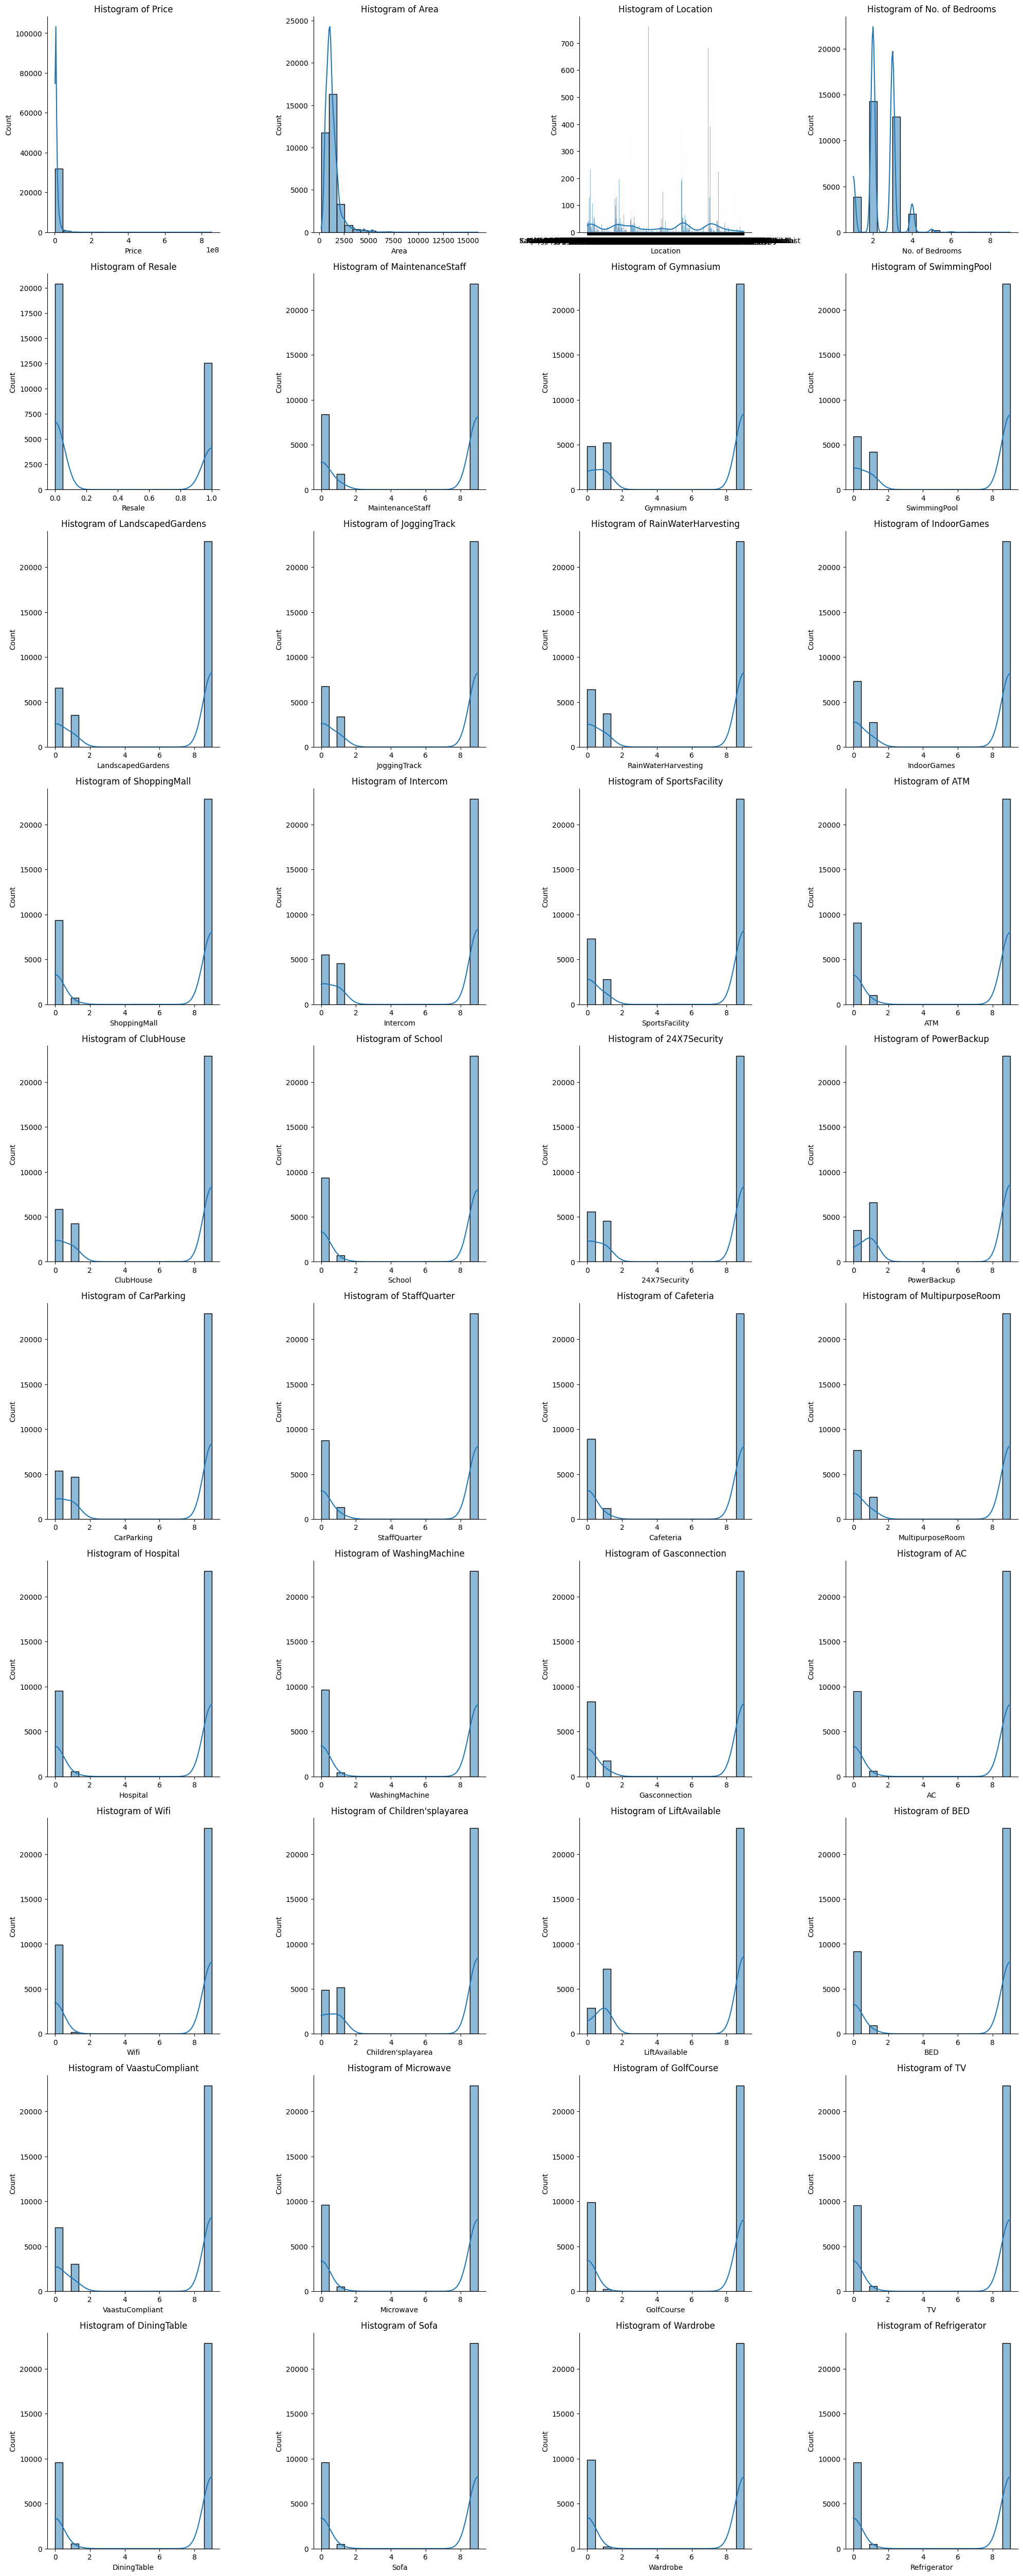

In [21]:
n_cols = 4
n_rows = (len(df.columns) + n_cols - 1)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for idx, column in enumerate(df.columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Histogram of {column}')
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['right'].set_visible(False)

# Remove any empty subplots
for idx in range(len(df.columns), n_rows * n_cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

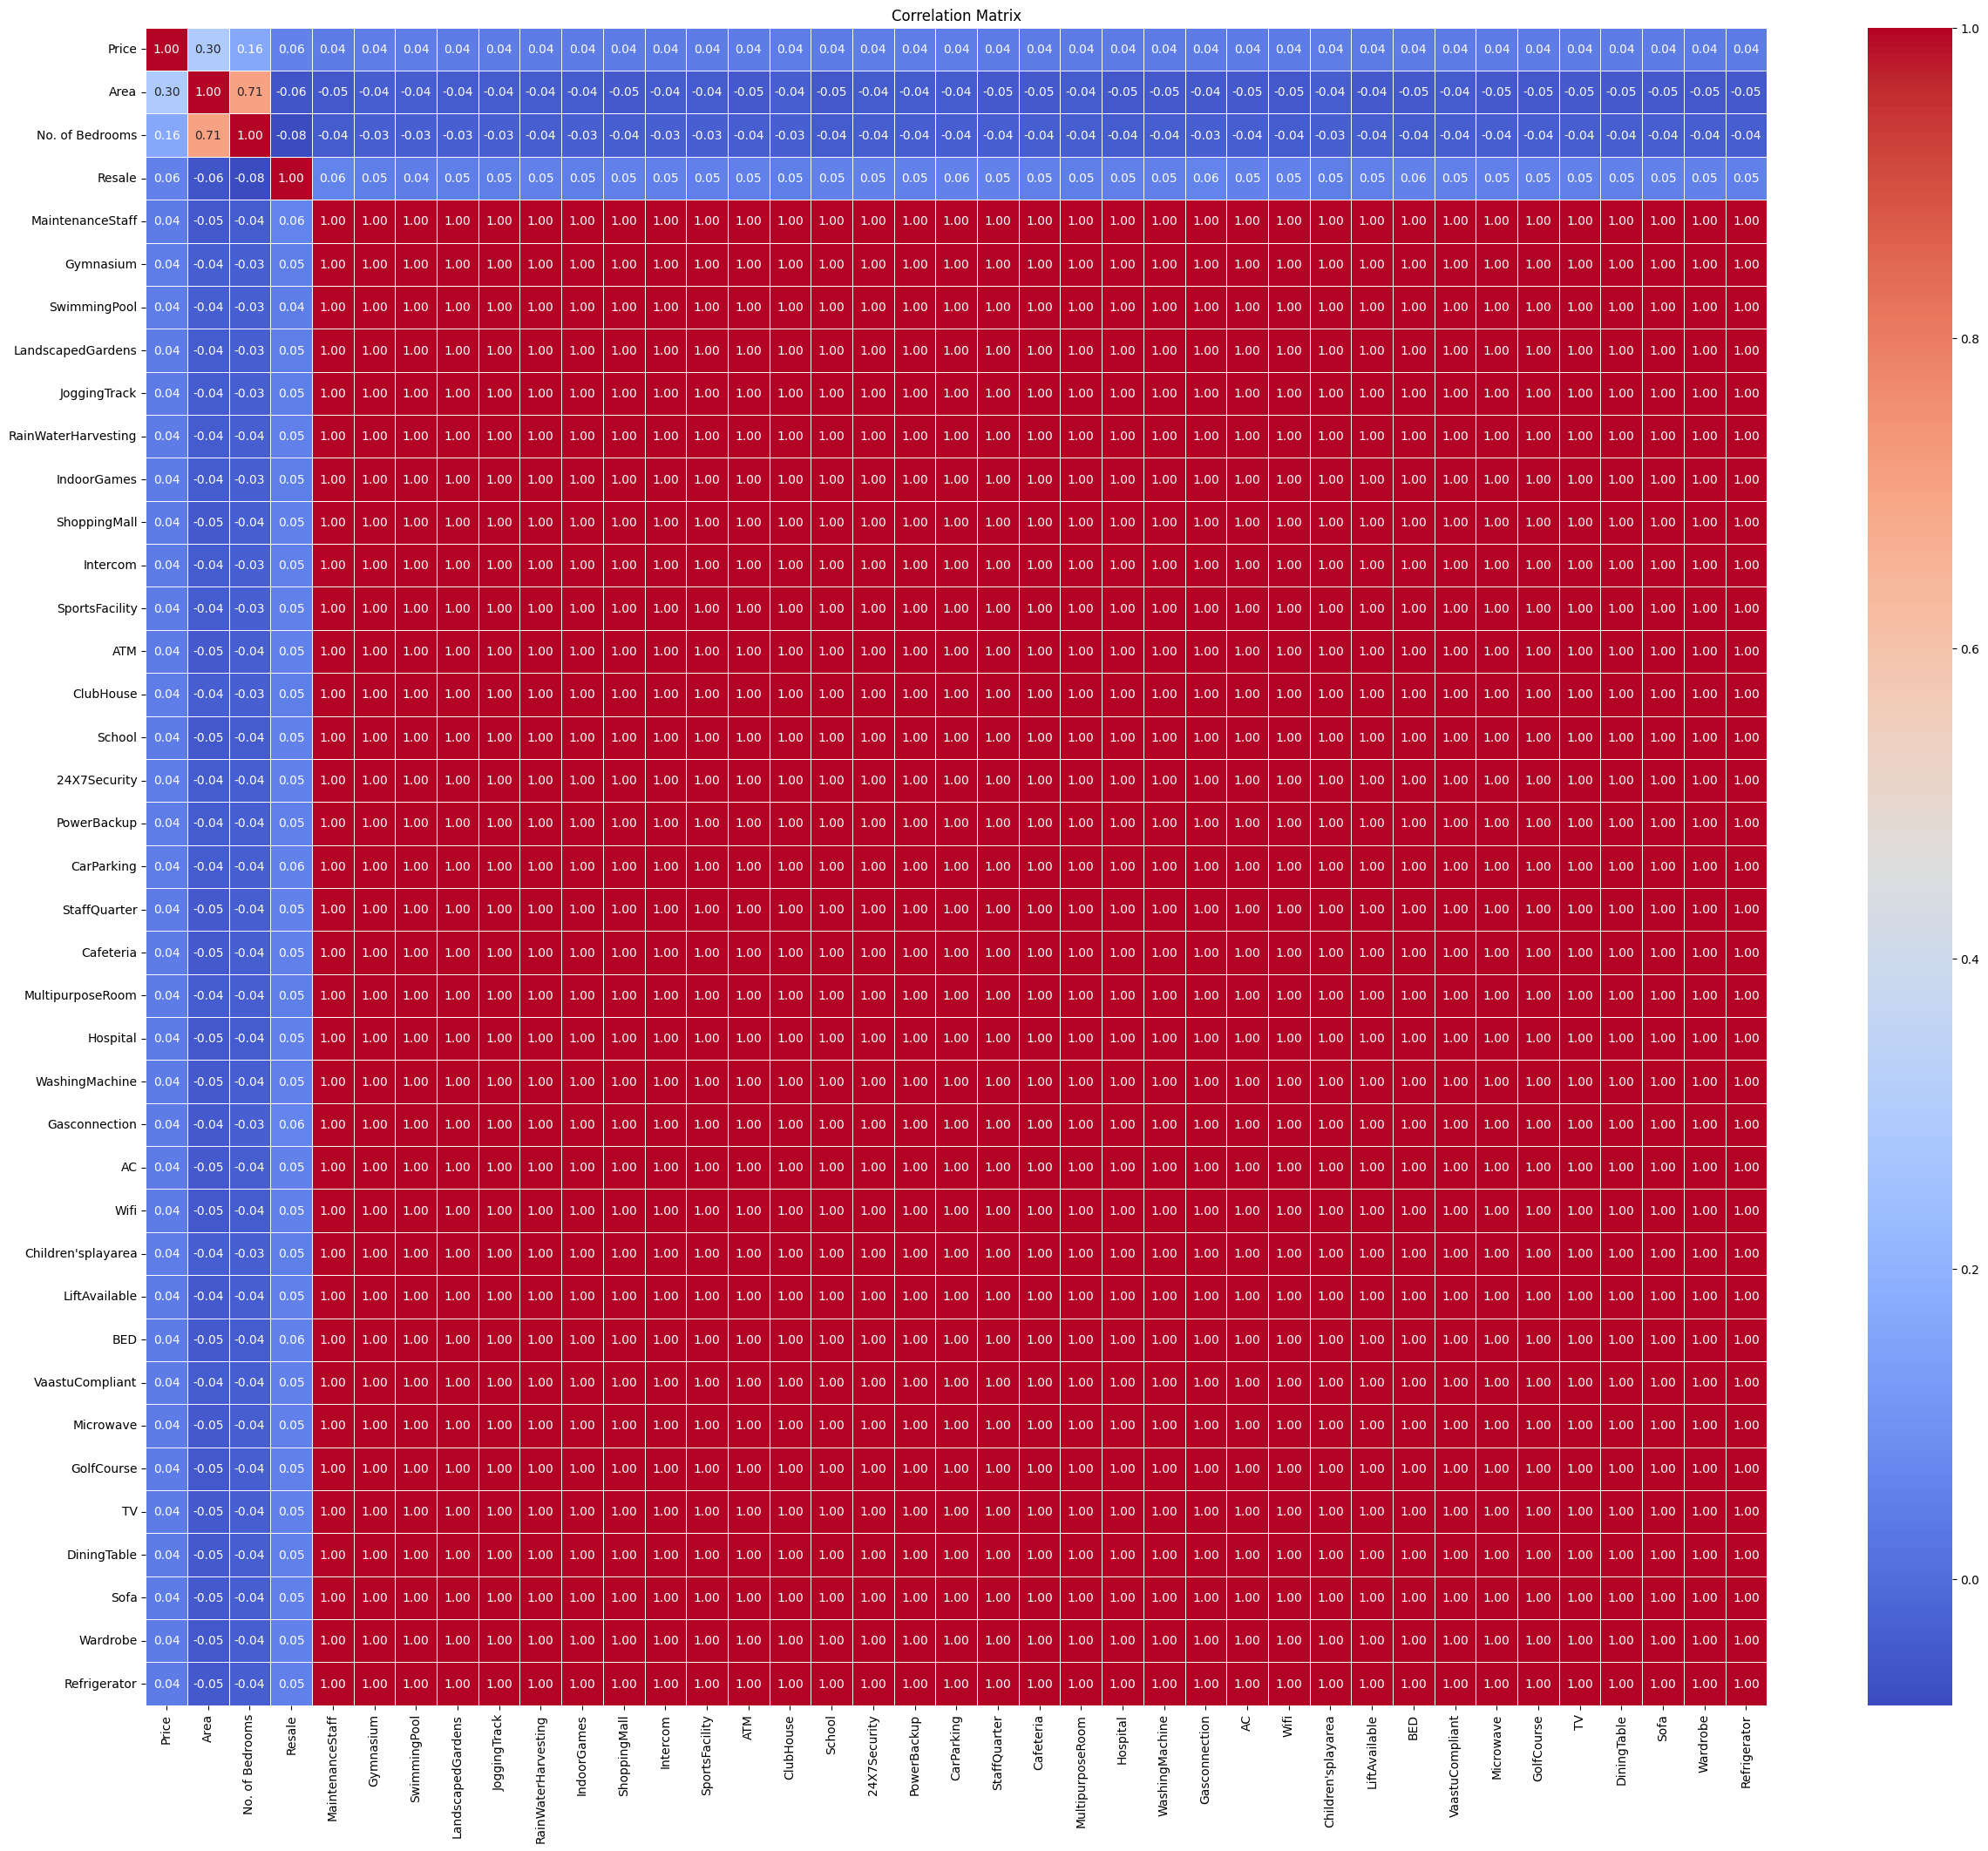

In [22]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
target = 'Price'
number_columns = df.select_dtypes(exclude='object')
selector = VarianceThreshold(threshold=0.01)
number_columns_reduced = selector.fit_transform(number_columns)
selected_columns = number_columns.columns[selector.get_support()]
number_columns_reduced_df = pd.DataFrame(number_columns_reduced, columns=selected_columns)
number_columns_reduced_df[target] = df[target]
correlation_matrix = number_columns_reduced_df.corr()
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [23]:
correlation_matrix

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.000000,0.295062,0.163689,0.057410,0.039533,0.041247,0.041525,0.040677,0.040188,0.040948,...,0.039589,0.039500,0.039279,0.039016,0.038514,0.039125,0.038966,0.039052,0.038882,0.039134
Area,0.295062,1.000000,0.706007,-0.057304,-0.048674,-0.038306,-0.037183,-0.040399,-0.039786,-0.041423,...,-0.044236,-0.047606,-0.043396,-0.046494,-0.047808,-0.046955,-0.046786,-0.046696,-0.047988,-0.046777
No. of Bedrooms,0.163689,0.706007,1.000000,-0.081430,-0.041628,-0.034151,-0.032588,-0.034879,-0.034571,-0.036622,...,-0.035475,-0.039420,-0.036385,-0.037706,-0.038932,-0.037976,-0.037857,-0.037964,-0.038994,-0.037885
Resale,0.057410,-0.057304,-0.081430,1.000000,0.060388,0.047160,0.044637,0.048145,0.046946,0.052463,...,0.053522,0.057033,0.053369,0.052851,0.052646,0.053394,0.052925,0.053503,0.054885,0.052993
MaintenanceStaff,0.039533,-0.048674,-0.041628,0.060388,1.000000,0.996703,0.996574,0.997164,0.997125,0.997564,...,0.996997,0.998400,0.997422,0.998261,0.998651,0.998261,0.998213,0.998244,0.998626,0.998233
Gymnasium,0.041247,-0.038306,-0.034151,0.047160,0.996703,1.000000,0.998830,0.998032,0.998295,0.997547,...,0.997088,0.997103,0.997156,0.997313,0.997511,0.997188,0.997315,0.997362,0.997290,0.997291
SwimmingPool,0.041525,-0.037183,-0.032588,0.044637,0.996574,0.998830,1.000000,0.998323,0.998604,0.997828,...,0.996931,0.996909,0.997494,0.997504,0.997671,0.997355,0.997502,0.997523,0.997442,0.997480
LandscapedGardens,0.040677,-0.040399,-0.034879,0.048145,0.997164,0.998032,0.998323,1.000000,0.998626,0.998166,...,0.996891,0.997102,0.997687,0.997552,0.997864,0.997429,0.997545,0.997591,0.997672,0.997545
JoggingTrack,0.040188,-0.039786,-0.034571,0.046946,0.997125,0.998295,0.998604,0.998626,1.000000,0.998315,...,0.996812,0.997035,0.998100,0.997593,0.997932,0.997475,0.997556,0.997576,0.997661,0.997573
RainWaterHarvesting,0.040948,-0.041423,-0.036622,0.052463,0.997564,0.997547,0.997828,0.998166,0.998315,1.000000,...,0.996884,0.996962,0.998125,0.997408,0.997765,0.997392,0.997384,0.997416,0.997656,0.997405


In [24]:
selected_columns = ['Area', 'No. of Bedrooms', 'SportsFacility', 'ClubHouse']

In [25]:
frames = [df]
merged = pd.concat(frames)
merged = merged.loc[:, ~merged.columns.str.contains('^Unnamed')]

In [26]:
# Correlations

merged.columns
merged = merged.rename(columns={"Children'splayarea": "ChildrenPlayArea"})
merged = merged.dropna()

In [27]:



feature_names = ['Area','No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'ChildrenPlayArea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']

X = merged[feature_names]
y = merged['Price']

In [28]:
X


,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,3340,4,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,1045,2,0,0,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,1179,2,0,0,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1675,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1670,3,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32958,1180,2,0,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32959,530,1,1,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32960,700,1,0,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32961,995,2,0,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [29]:
y

0        30000000
1         7888000
2         4866000
3         8358000
4         6845000
           ...   
32958    14500000
32959    14500000
32960     4100000
32961     2750000
32962     2750000
Name: Price, Length: 32963, dtype: int64

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)
model = RandomForestRegressor().fit(train_X, train_y)

In [31]:
model


RandomForestRegressor()

In [32]:
print(merged.columns)

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'ChildrenPlayArea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')


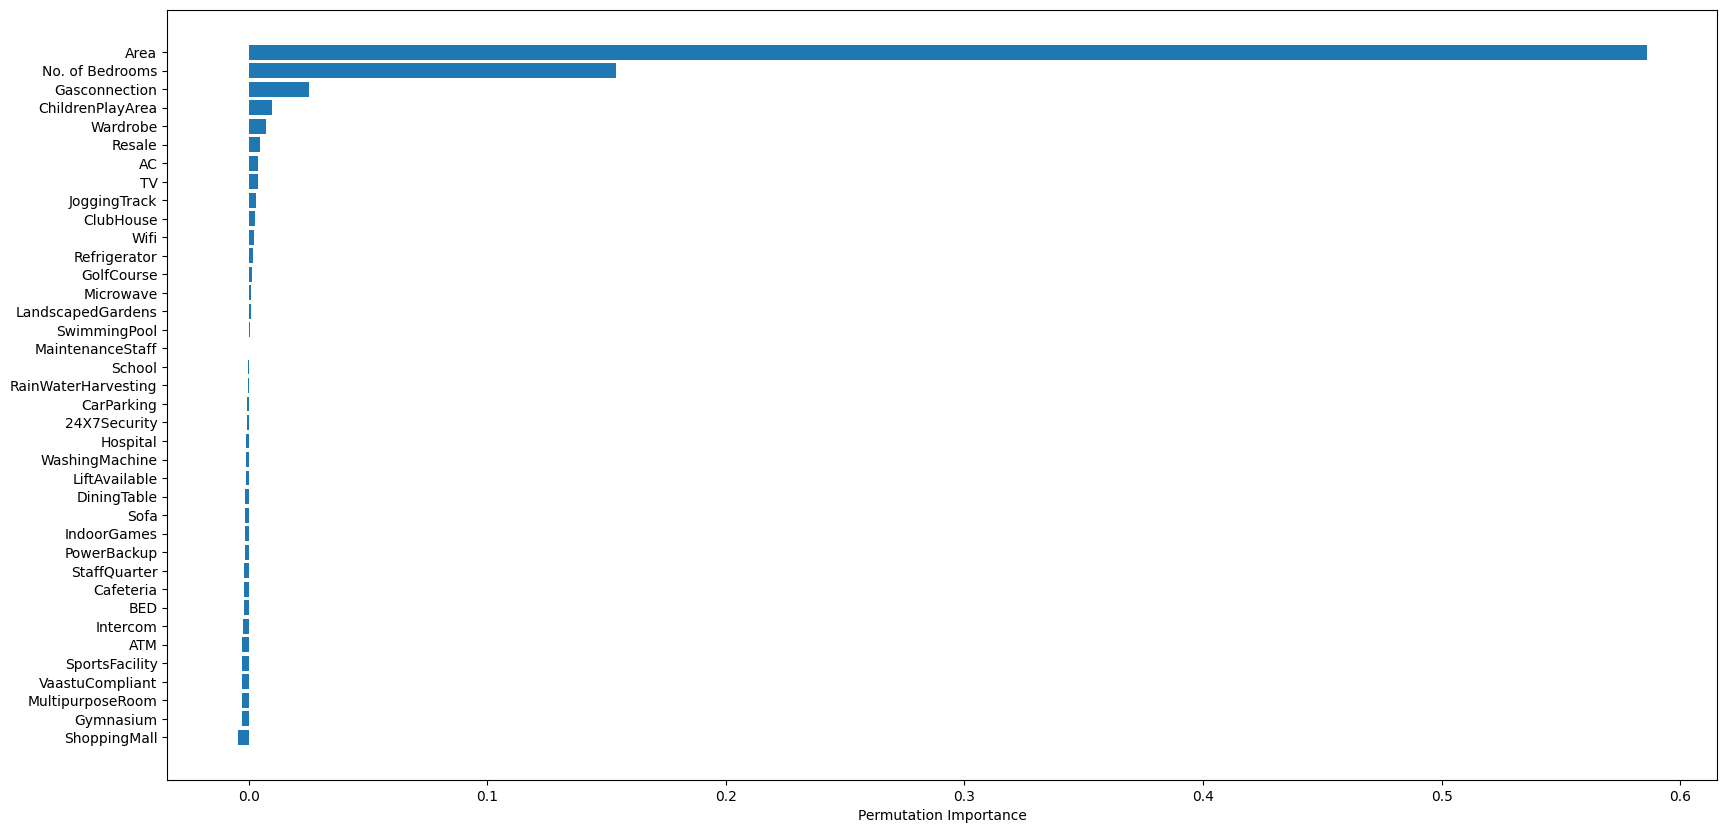

In [33]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Calculate permutation importance
perm = permutation_importance(model, test_X, test_y, random_state=1)

# Sort and plot the feature importance
sorted_idx = perm.importances_mean.argsort()
plt.barh(test_X.columns[sorted_idx], perm.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [34]:
model2 = DecisionTreeRegressor(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

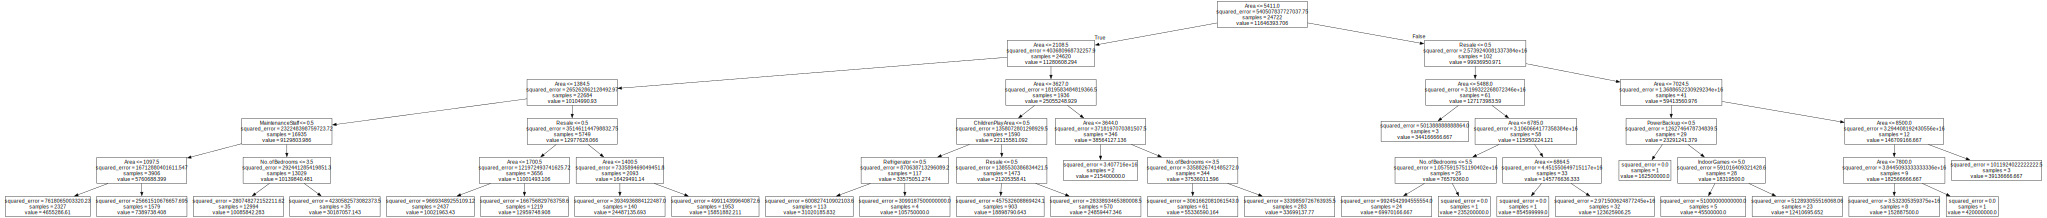

In [35]:
import graphviz
from sklearn import tree

tree_graph = tree.export_graphviz(model2, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph) #the leaves indicate splitting criteria, the branches represent true or false 

C:\Users\DELL\AppData\Local\Temp\ipykernel_15524\3122575216.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fi, x='importance', y='feature',palette="spring_r")


Text(0.5, 1.0, 'Feature Importance')

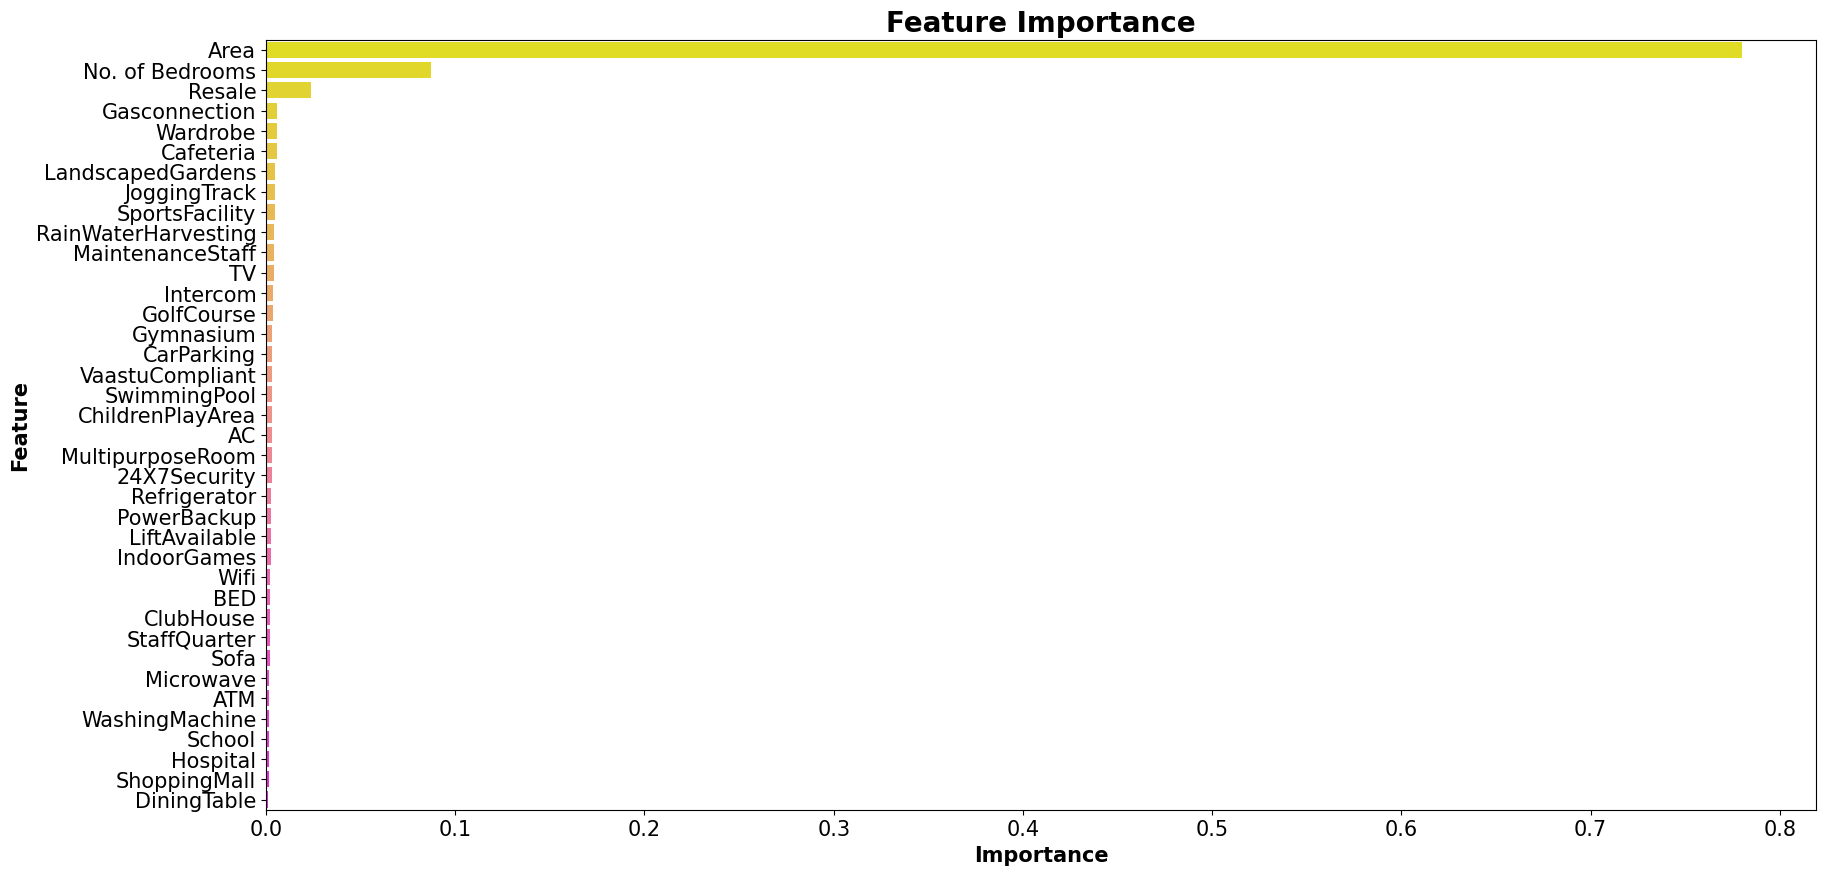

In [36]:
model3= ExtraTreesRegressor()
model3.fit(train_X,train_y)
fi = pd.DataFrame(model3.feature_importances_,columns=['importance'])
fi['feature'] = feature_names
fi = fi.sort_values('importance', ascending=False)

plt.figure(figsize=(20,10))
ax = sns.barplot(data=fi, x='importance', y='feature',palette="spring_r")
ax.tick_params(axis='both',which ='both',labelsize=15),
ax.set_xlabel('Importance', fontsize=15, weight='bold'),
ax.set_ylabel('Feature', fontsize=15, weight='bold'),
plt.title('Feature Importance', size=20, weight='bold')

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(train_X,train_y)
lr.score(test_X,test_y)

0.11662835279668027

In [39]:
y_pred = lr.predict(test_X)

In [40]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.05173544, 0.0924551 , 0.07528786, 0.09840266, 0.08136856])

In [41]:
print("Mean Absolute Error",mean_absolute_error(test_y,y_pred))
print("Mean Squared Error",mean_squared_error(test_y,y_pred))
print("R2 Score", r2_score(test_y, y_pred))

Mean Absolute Error 7956015.597795785
Mean Squared Error 448728480680539.8
R2 Score 0.11662835279668027


In [42]:
results = []
def train_model(m, name):
    model = m
    model.fit(X=train_X, y=train_y)
    predictions = model.predict(test_X)
    MeanAbsoluteError = mean_absolute_error(test_y, predictions)
    R2Score = r2_score(test_y, predictions)
    MeanSquaredError = mean_squared_error(test_y, predictions)
    results.append({
        "Model": name,
        "MAE": MeanAbsoluteError,
        "R2 Score": R2Score,
        "MSE": MeanSquaredError
    })
    print(f"{name}: MAE = {MeanAbsoluteError:.4f}, R2 = {R2Score:.4f}, MSE = {MeanSquaredError:.4f}")

# Call the function for different models
train_model(DecisionTreeRegressor(), 'Decision Tree Regressor')
train_model(RandomForestRegressor(), 'Random Forest Regressor')
train_model(XGBRegressor(n_estimators=680), 'XGBoost Regressor')

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)


Decision Tree Regressor: MAE = 8209588.9405, R2 = -0.3060, MSE = 663423341929855.7500
Random Forest Regressor: MAE = 7743820.8486, R2 = 0.0328, MSE = 491298511053789.5000
XGBoost Regressor: MAE = 7534740.2057, R2 = 0.0918, MSE = 461315906086338.1875

Model Comparison:
                     Model           MAE  R2 Score           MSE
0  Decision Tree Regressor  8.209589e+06 -0.306022  6.634233e+14
1  Random Forest Regressor  7.743821e+06  0.032825  4.912985e+14
2        XGBoost Regressor  7.534740e+06  0.091849  4.613159e+14


In [43]:
#model building
#machine learning model does not understand text so we will take dummy values of each 
#location and when '1' comes means that location is considered
dummies=pd.get_dummies(df.Location)
dummies.head(10)

,1 Lane Johri Farm,10 Sector Dwarka,15th Road,200 Feet Radial Road,3 Dwarka Sector 9 Road,4 Bunglows,47 Sector 22 Road,48 Sector 22 Road,59 Sector 22 Road,5th Phase,...,tambaram west,thakur village kandivali east,ulhasnagar 4,vasant vihar thane west,vikaspuri,vile parle west,vrindavan society,west venkatapuram,worli sea Fase,worli sea face
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
y=df.Price

In [45]:
y

0        30000000
1         7888000
2         4866000
3         8358000
4         6845000
           ...   
32958    14500000
32959    14500000
32960     4100000
32961     2750000
32962     2750000
Name: Price, Length: 32963, dtype: int64

In [46]:

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(X,y)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.175e+18, tolerance: 1.392e+15
  model = cd_fast.enet_coordinate_descent(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.578e+18, tolerance: 1.465e+15
  model = cd_fast.enet_coordinate_descent(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

,model,best_score,best_params
0,linear_regression,0.079853,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.079824,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,-0.091748,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [47]:
X.columns

Index(['Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium',
       'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'ChildrenPlayArea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator'],
      dtype='object')

In [48]:
feature_columns = X.columns

In [49]:
def predict_price(location, area, bedrooms, resale, maintenance_staff, gymnasium, swimming_pool, landscaped_gardens, jogging_track, rain_water_harvesting, indoor_games, shopping_mall, intercom, sports_facility, atm, clubhouse, school, security, power_backup, car_parking, staff_quarter, cafeteria, multipurpose_room, hospital, washing_machine, gas_connection, ac, wifi, childrens_play_area, lift_available, bed, vaastu_compliant, microwave, golf_course, tv, dining_table, sofa, wardrobe, refrigerator, feature_columns):    
    # Find the index of the location column
    loc_index = np.where(feature_columns == location)[0][0] if location in feature_columns else -1

    # Initialize the feature array with zeros
    feature_vector = np.zeros(len(feature_columns))
    
    # Set feature values
    feature_vector[0] = area
    feature_vector[1] = bedrooms
    feature_vector[2:] = [
        resale, maintenance_staff, gymnasium, swimming_pool, landscaped_gardens, jogging_track, rain_water_harvesting,
        indoor_games, shopping_mall, intercom, sports_facility, atm, clubhouse, school, security, power_backup,
        car_parking, staff_quarter, cafeteria, multipurpose_room, hospital, washing_machine, gas_connection, ac,
        wifi, childrens_play_area, lift_available, bed, vaastu_compliant, microwave, golf_course, tv, dining_table,
        sofa, wardrobe, refrigerator
    ]
    
    # Mark the location in the feature vector
    if loc_index >= 0:
        feature_vector[loc_index] = 1

    # Return the predicted price
    return lr.predict([feature_vector])[0]


In [50]:
predict_price('Ramamurthy Nagar',1438,3,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,feature_columns=feature_columns)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


5884956.367140302

In [51]:
predict_price('Dasarahalli on Tumkur Road',1045,2,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,feature_columns=feature_columns)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6222516.184092158

In [52]:
predict_price('JP Nagar Phase 1',3340,4,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,feature_columns=feature_columns)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27717243.889985003

In [55]:
predict_price('Kahrghar',1000,2,1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,feature_columns=feature_columns)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


10242532.341882272